# Decision tree modelling 

### Predicting customer churn

### I am assigned to use tree-base models which is a decision tree to predict customer churn(the percentage of customers that stopped using a companys product or service during a certain time frame) 

In [2]:
#importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dst = pd.read_csv('Telco-Customer-Churn.csv')
dst.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dst.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
dst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
dst.TotalCharges = pd.to_numeric(dst.TotalCharges, errors='coerce')
dst.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
print(dst['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


Text(0.5, 1.0, 'churned')

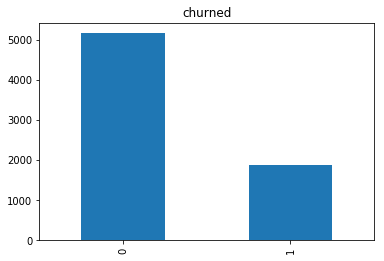

In [8]:
dst.dropna(inplace=True)

dst = dst.drop(['customerID'], axis=1)

target = 'Churn'
dst[target].replace(to_replace='Yes', value=1, inplace=True)
dst[target].replace(to_replace='No',  value=0, inplace=True)

dst[target].value_counts().plot('bar').set_title('churned')

In [29]:
df_dummies = pd.get_dummies(dst)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [30]:
dst.shape

(7032, 20)

In [31]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

train, test = train_test_split(df_dummies, test_size = 0.3, random_state=1)
 
train_y = train['Churn']
test_y = test['Churn']
 
train_x = train
train_x.pop('Churn').head()
test_x = test
test_x.pop('Churn').head()

1778    0
5036    1
1106    0
1665    0
927     1
Name: Churn, dtype: int64

In [32]:
train_x.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.165989,32.342544,65.070388,2297.232629,0.494514,0.505486,0.518285,0.481715,0.699919,0.300081,...,0.384193,0.549573,0.210890,0.239537,0.406339,0.593661,0.213531,0.214953,0.337464,0.234051
std,0.372109,24.546173,30.145525,2282.689889,0.500021,0.500021,0.499716,0.499716,0.458340,0.458340,...,0.486453,0.497587,0.407982,0.426844,0.491199,0.491199,0.409841,0.410832,0.472893,0.423447
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,36.112500,389.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.475000,1416.350000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.000000,3778.075000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
train_x.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.008435,0.229842,0.101742,0.010902,-0.010902,-0.008130,0.008130,0.219432,-0.219432,...,0.114636,0.143772,-0.047247,-0.122441,-0.163408,0.163408,-0.005936,-0.026076,0.167785,-0.156333
tenure,0.008435,1.000000,0.260407,0.828701,-0.011072,0.011072,-0.378649,0.378649,-0.164784,0.164784,...,0.291821,-0.647600,0.202014,0.561842,-0.014547,0.014547,0.241650,0.234833,-0.204581,-0.233252
MonthlyCharges,0.229842,0.260407,1.000000,0.657954,0.010479,-0.010479,-0.095319,0.095319,0.119324,-0.119324,...,0.626793,0.047600,0.008055,-0.063188,-0.355295,0.355295,0.055701,0.038221,0.261756,-0.383315
TotalCharges,0.101742,0.828701,0.657954,1.000000,-0.007346,0.007346,-0.312691,0.312691,-0.062563,0.062563,...,0.521306,-0.450070,0.170917,0.361298,-0.167619,0.167619,0.191161,0.190304,-0.062623,-0.299718
gender_Female,0.010902,-0.011072,0.010479,-0.007346,1.000000,-1.000000,0.015040,-0.015040,0.017200,-0.017200,...,0.015768,0.009261,-0.012258,0.000921,-0.018226,0.018226,0.015137,-0.000194,-0.007209,-0.006412
gender_Male,-0.010902,0.011072,-0.010479,0.007346,-1.000000,1.000000,-0.015040,0.015040,-0.017200,0.017200,...,-0.015768,-0.009261,0.012258,-0.000921,0.018226,-0.018226,-0.015137,0.000194,0.007209,0.006412
Partner_No,-0.008130,-0.378649,-0.095319,-0.312691,0.015040,-0.015040,1.000000,-1.000000,0.450275,-0.450275,...,-0.117098,0.277079,-0.071746,-0.254425,-0.014546,0.014546,-0.095965,-0.080518,0.066324,0.096932
Partner_Yes,0.008130,0.378649,0.095319,0.312691,-0.015040,0.015040,-1.000000,1.000000,-0.450275,0.450275,...,0.117098,-0.277079,0.071746,0.254425,0.014546,-0.014546,0.095965,0.080518,-0.066324,-0.096932
Dependents_No,0.219432,-0.164784,0.119324,-0.062563,0.017200,-0.017200,0.450275,-0.450275,1.000000,-1.000000,...,0.034136,0.239436,-0.072284,-0.210029,-0.120803,0.120803,-0.037446,-0.060989,0.143854,-0.065237
Dependents_Yes,-0.219432,0.164784,-0.119324,0.062563,-0.017200,0.017200,-0.450275,0.450275,-1.000000,1.000000,...,-0.034136,-0.239436,0.072284,0.210029,0.120803,-0.120803,0.037446,0.060989,-0.143854,0.065237


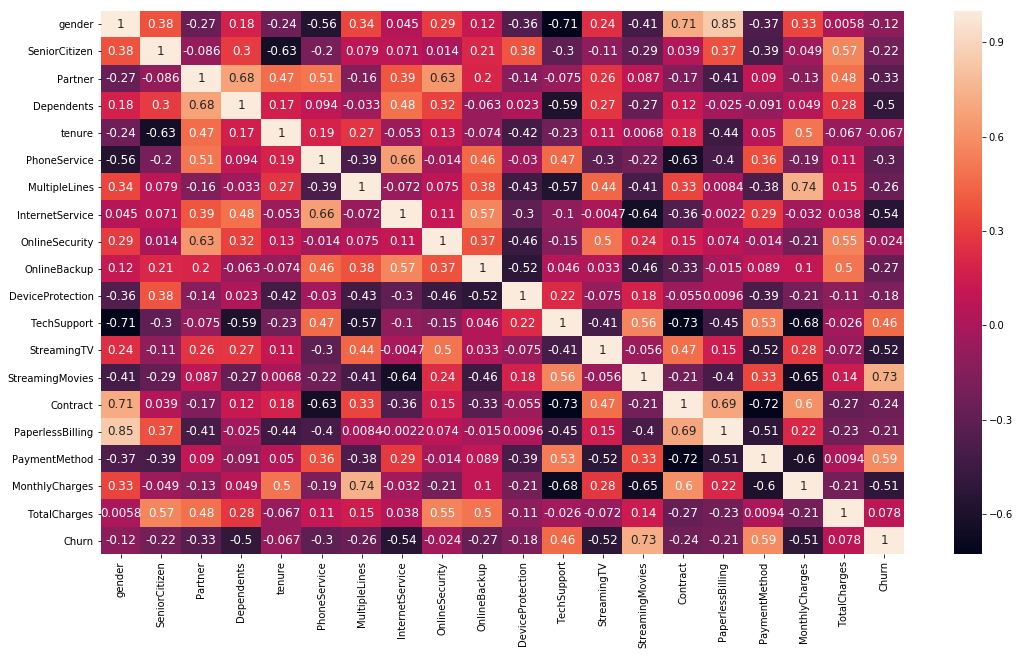

In [67]:
import seaborn as sns
plt.figure(figsize=(18,10))
cols = dst.columns
df = pd.DataFrame(abs(np.random.randn(9, 20)), columns= cols)

sns.heatmap(df.corr(), annot=True, annot_kws={'size':12})

factors

gender
SeniorCitizen
Partner
Dependents

PhoneService

MultipleLines

InternetService

OnlineSecurity

OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod

In [37]:
telco_model = tree.DecisionTreeRegressor(max_leaf_nodes=700,random_state=5)
telco_model.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=700, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=5, splitter='best')

In [69]:
from sklearn.metrics import mean_squared_error
y_pred = telco_model.predict(train_x)

mse_model = mean_squared_error(train_y, y_pred)

#Evaluating the trainoing set performance of the telco_model
rmse_model = np.sqrt(mse_model)
print("RMSE of telco_model: ", rmse_model)

RMSE of telco_model:  0.14118147744004117


In [70]:
y_pred = telco_model.predict(test_x)

mse_model = mean_squared_error(test_y, y_pred)

#Evaluating the test set performance of the telco_model
rmse_model = np.sqrt(mse_model)
print("RMSE of telco_model: ", rmse_model)

RMSE of telco_model:  0.5073377850603746
